In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

In [2]:
df = pd.read_csv('metadata_cleaned.csv', parse_dates=['publish_time'])

In [3]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
df['publish_year'] = df['publish_time'].dt.year
year_counts = df['publish_year'].value_counts().sort_index()


In [5]:
top_journals = df['journal'].value_counts().head(10)

In [6]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text


In [7]:
title_words = df['title'].dropna().apply(clean_text).str.split()
flat_words = [word for sublist in title_words for word in sublist if len(word) > 3]
word_freq = Counter(flat_words)
top_words = dict(word_freq.most_common(20))

C:\Users\nessy\AppData\Local\Temp\ipykernel_14052\4151898372.py:6: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\nessy\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


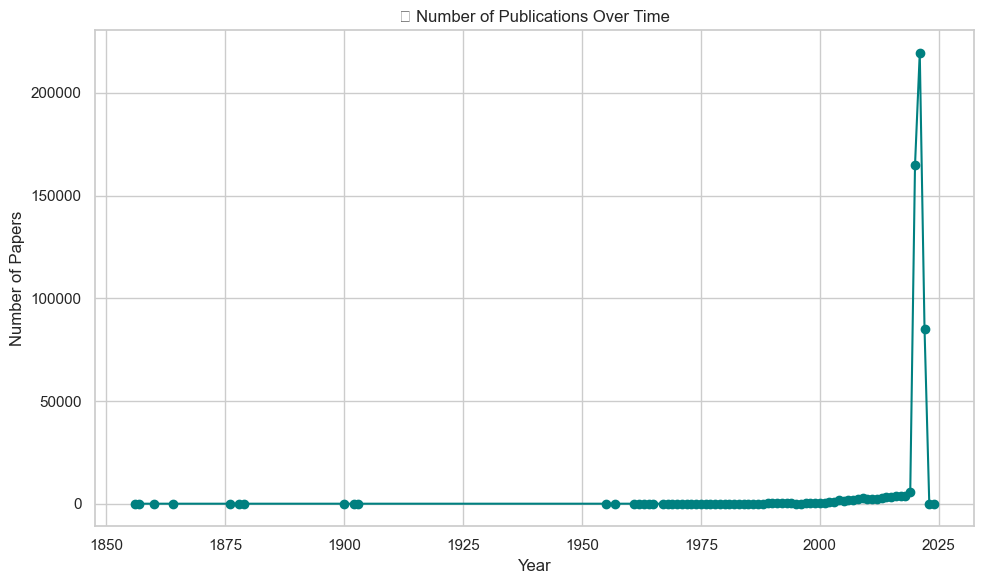

In [8]:
plt.figure()
year_counts.plot(kind='line', marker='o', color='teal')
plt.title('📈 Number of Publications Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.tight_layout()
plt.show()


C:\Users\nessy\AppData\Local\Temp\ipykernel_14052\4227632252.py:7: UserWarning: Glyph 127963 (\N{CLASSICAL BUILDING}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\nessy\AppData\Local\Temp\ipykernel_14052\4227632252.py:7: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\nessy\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127963 (\N{CLASSICAL BUILDING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nessy\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


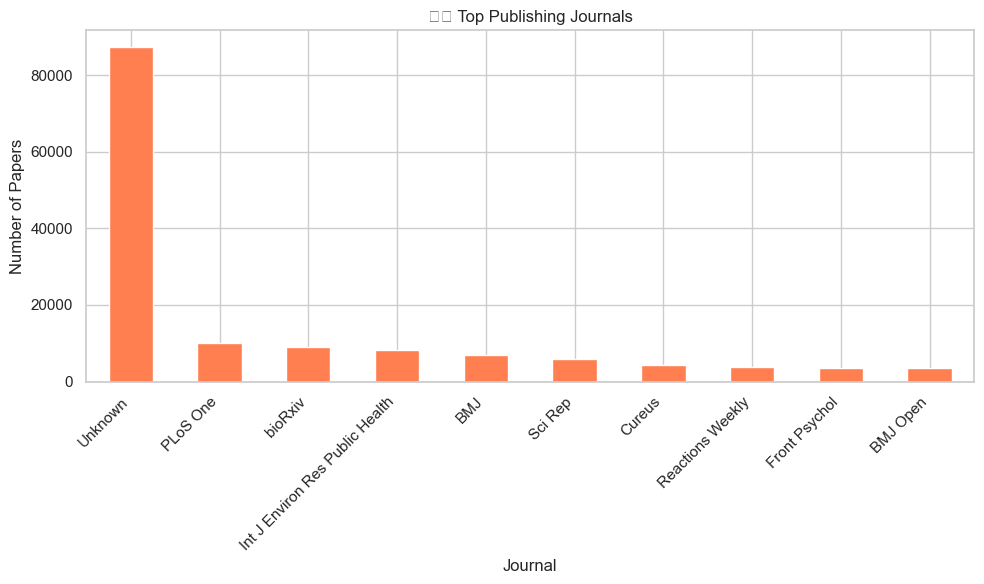

In [9]:
plt.figure()
top_journals.plot(kind='bar', color='coral')
plt.title('🏛️ Top Publishing Journals')
plt.xlabel('Journal')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\nessy\AppData\Local\Temp\ipykernel_14052\2475896628.py:7: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\nessy\AppData\Local\Temp\ipykernel_14052\2475896628.py:7: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\nessy\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nessy\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


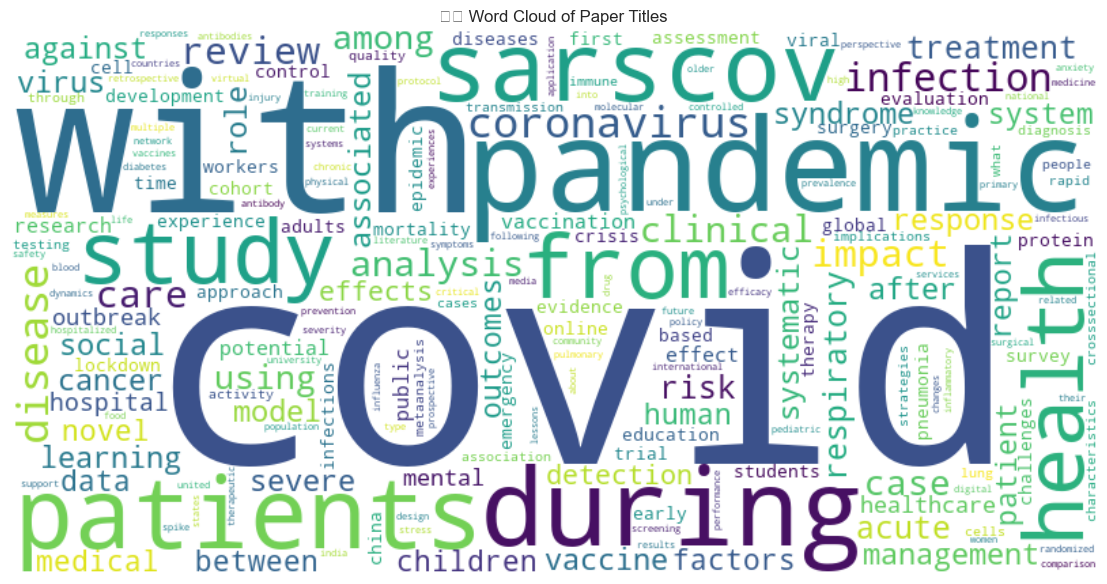

In [10]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('☁️ Word Cloud of Paper Titles')
plt.tight_layout()
plt.show()


C:\Users\nessy\AppData\Local\Temp\ipykernel_14052\3742118130.py:9: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\nessy\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


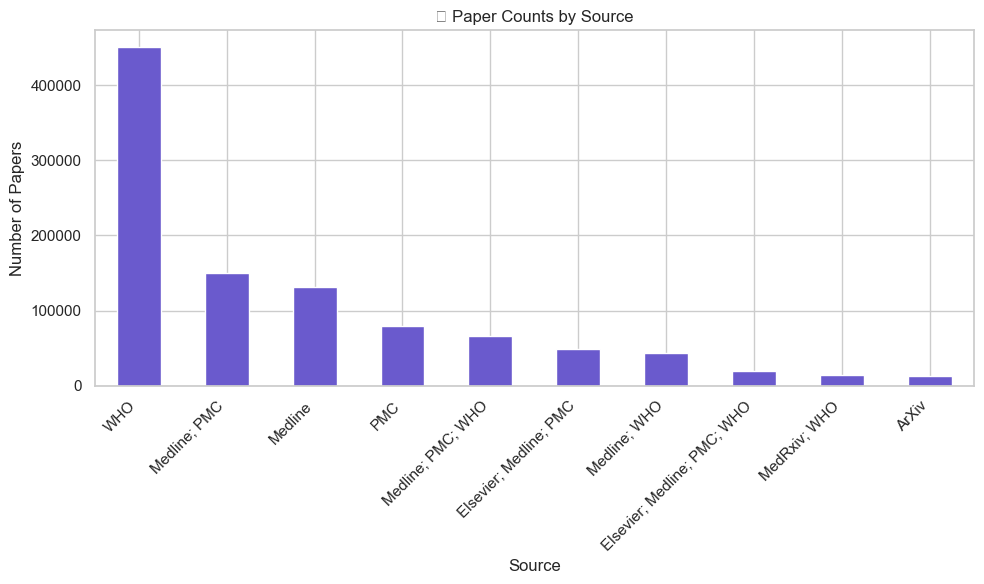

In [11]:
if 'source_x' in df.columns:
    source_counts = df['source_x'].value_counts().head(10)
    plt.figure()
    source_counts.plot(kind='bar', color='slateblue')
    plt.title('🧪 Paper Counts by Source')
    plt.xlabel('Source')
    plt.ylabel('Number of Papers')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Column 'source_x' not found in dataset.")
